# German Air Fares Analysis 

## By : Putu Angga Kurniawan 

### Introduction 

In this analysis, I delve into a dataset that contains information about air fares in Germany. Our goal is to uncover patterns and insights that could potentially influence pricing strategies and customer behavior. We explore various factors such as departure and arrival airports, flight duration, booking period, and more.

I begin by cleaning and preprocessing the data to ensure it’s in the right format for our analysis. Then proceed to create new features that could provide additional insights, such as the route taken (a combination of the departure and arrival cities).

This analysis involves a variety of visualizations including bar plots and scatter plots, which help us better understand the relationships between different variables. For instance, we examine the average price per departure airport, arrival airport, and booking period. We also look at the correlation between flight duration and price.

Through this EDA, my aim is to provide valuable insights that could be useful for both customers looking to find the best deals and airlines aiming to optimize their pricing strategies. We hope you find this analysis informative and insightful! 

### Import Necessary Libraries 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from datetime import datetime, timedelta
import networkx as nx

### Import The Dataset

In [11]:
data = pd.read_csv('German Air Fares.csv')
data 

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€)
0,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:30am,7:45am,Eurowings,direct,74.00
1,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:40am,7:55am,easyJet,direct,75.00
2,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:45am,8:00am,easyJet,direct,80.00
3,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:15am,7:30am,Eurowings,direct,84.00
4,TXL Berlin-Tegel,DUS Düsseldorf,18.10.2019,25.10.2019,1 week,6:55am,8:10am,Eurowings,direct,84.00
...,...,...,...,...,...,...,...,...,...,...
62622,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,10:30 Uhr,11:40 Uhr,Eurowings,direct,102.00
62623,STR Stuttgart,HAJ Hannover,24.10.2019,24.04.2020,6 months,07:00 Uhr,08:05 Uhr,Eurowings,direct,192.00
62624,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,15:05 Uhr,16:10 Uhr,Eurowings,direct,72.00
62625,STR Stuttgart,LEJ Leipzig/Halle,24.10.2019,24.04.2020,6 months,06:15 Uhr,07:25 Uhr,Eurowings,direct,72.00


### Basic Information of The Data 

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   departure_city           62626 non-null  object
 1   arrival_city             62626 non-null  object
 2   scrape_date              62626 non-null  object
 3   departure_date           62626 non-null  object
 4   departure_date_distance  62626 non-null  object
 5   departure_time           62626 non-null  object
 6   arrival_time             62626 non-null  object
 7   airline                  62626 non-null  object
 8   stops                    62626 non-null  object
 9   price (€)                62627 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB
None


- <class 'pandas.core.frame.DataFrame'>: This indicates that the object is a pandas DataFrame.

- RangeIndex: 62627 entries, 0 to 62626: This tells us that the DataFrame has 62,627 rows (or entries). The index for these entries ranges from 0 to 62,626.

- Data columns (total 10 columns): This tells us that the DataFrame has 10 columns.

- The next section lists out all the column names (departure_city, arrival_city, scrape_date, departure_date, departure_date_distance, departure_time, arrival_time, airline, stops, price (€)), the number of non-null entries in each column, and the data type of each column. In this case, all columns are of the object data type, which usually means they contain text or mixed numeric and non-numeric values.

- dtypes: object(10): This tells us that all columns in the DataFrame are of the object data type.

- memory usage: 4.8+ MB: This tells us that the DataFrame uses over 4.8 megabytes of memory.

In [39]:
data['scrape_date'] = pd.to_datetime(data['scrape_date'], format='%d.%m.%Y')
data['departure_date'] = pd.to_datetime(data['departure_date'], format='%d.%m.%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62626 entries, 0 to 62625
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   departure_city           62626 non-null  object        
 1   arrival_city             62626 non-null  object        
 2   scrape_date              62626 non-null  datetime64[ns]
 3   departure_date           62626 non-null  datetime64[ns]
 4   departure_date_distance  62626 non-null  object        
 5   departure_time           62626 non-null  object        
 6   arrival_time             62626 non-null  object        
 7   airline                  62626 non-null  object        
 8   stops                    62626 non-null  object        
 9   price (€)                62392 non-null  float64       
 10  fare_bin                 62392 non-null  category      
dtypes: category(1), datetime64[ns](2), float64(1), object(7)
memory usage: 57.9+ MB


C:\Users\mades\AppData\Local\Temp\ipykernel_33488\1064008996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['scrape_date'] = pd.to_datetime(data['scrape_date'], format='%d.%m.%Y')
C:\Users\mades\AppData\Local\Temp\ipykernel_33488\1064008996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['departure_date'] = pd.to_datetime(data['departure_date'], format='%d.%m.%Y')


In [99]:
# Convert 'price (€)' column to string
data['price (€)'] = data['price (€)'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62626 entries, 2019-10-25 to 2020-04-24
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   departure_city           62626 non-null  object        
 1   arrival_city             62626 non-null  object        
 2   scrape_date              62626 non-null  datetime64[ns]
 3   departure_date_distance  62626 non-null  object        
 4   departure_time           62626 non-null  datetime64[ns]
 5   arrival_time             62626 non-null  object        
 6   airline                  62626 non-null  object        
 7   stops                    62626 non-null  object        
 8   price (€)                62626 non-null  object        
 9   fare_bin                 62392 non-null  category      
 10  departure_time_24h       62626 non-null  object        
 11  arrival_time_24h         62626 non-null  object        
 12  weekday        

C:\Users\mades\AppData\Local\Temp\ipykernel_33488\1994058836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price (€)'] = data['price (€)'].astype(str)


In [103]:
# Checking unique Values of 'departure_date_distance'
data['departure_date_distance'].unique()

array(['1 week', '2 week', '1 month', '3 month', '6 weeks', '6 months',
       '2 weeks'], dtype=object)

In [106]:
# Create a dictionary for the replacements
replacements = {
    '1 week': 7,
    '2 week': 14,
    '2 weeks': 14,
    '1 month': 30,
    '3 month': 90,
    '6 weeks': 42,
    '6 months': 180
}

# Replace the values
data['departure_date_distance'] = data['departure_date_distance'].replace(replacements)
data = data.rename(columns={'departure_date_distance': 'booking_period_in_days'})
data.head()

C:\Users\mades\AppData\Local\Temp\ipykernel_33488\569855040.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['departure_date_distance'] = data['departure_date_distance'].replace(replacements)


,departure_city,arrival_city,scrape_date,booking_period_in_days,departure_time,arrival_time,airline,stops,price (€),fare_bin,departure_time_24h,arrival_time_24h,weekday,departure_hour
departure_date,,,,,,,,,,,,,,
2019-10-25,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,7,2023-11-24 06:30:00,7:45 am,Eurowings,direct,74.0,"(70.0, 80.0]",6:30 am,7:45 am,Friday,6
2019-10-25,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,7,2023-11-24 06:40:00,7:55 am,easyJet,direct,75.0,"(70.0, 80.0]",6:40 am,7:55 am,Friday,6
2019-10-25,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,7,2023-11-24 06:45:00,8:00 am,easyJet,direct,80.0,"(70.0, 80.0]",6:45 am,8:00 am,Friday,6
2019-10-25,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,7,2023-11-24 06:15:00,7:30 am,Eurowings,direct,84.0,"(80.0, 90.0]",6:15 am,7:30 am,Friday,6
2019-10-25,TXL Berlin-Tegel,DUS Düsseldorf,2019-10-18,7,2023-11-24 06:55:00,8:10 am,Eurowings,direct,84.0,"(80.0, 90.0]",6:55 am,8:10 am,Friday,6


In [107]:
data['airline'].unique()

array(['Eurowings', 'easyJet', 'Lufthansa', 'Air France',
       'LOT-Polish Airlines', 'KLM', 'Swiss International Air Lines',
       'Multiple Airlines', 'Austrian Airlines', 'Luxair',
       'British Airways', 'SAS', 'Flybe', 'Alitalia',
       'Mehrere Fluglinien'], dtype=object)

In [108]:
data['stops'].unique()

array(['direct', '(1 stop)', '(1 Stopp)', '(2 Stopps)'], dtype=object)

In [109]:
# Create a dictionary for the replacements
stop_replacements = {
    'direct': 0,
    '(1 stop)': 1, 
    '(1 Stopp)': 1, 
    '(2 Stopps)': 2, 
}

# Replace the values
data['stops'] = data['stops'].replace(stop_replacements)
data['stops'].describe()

count    62626.000000
mean         0.597515
std          0.608719
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: stops, dtype: float64

### Check for Missing Values 

In [31]:
print(data.isnull().sum())

departure_city               1
arrival_city                 1
scrape_date                  1
departure_date               1
departure_date_distance      1
departure_time               1
arrival_time                 1
airline                      1
stops                        1
price (€)                  234
fare_bin                   234
dtype: int64


- departure_city: 1: There is 1 missing value in the departure_city column.
- arrival_city: 1: There is 1 missing value in the arrival_city column.
- scrape_date: 1: There is 1 missing value in the scrape_date column.
- departure_date: 1: There is 1 missing value in the departure_date column.
- departure_date_distance: 1: There is 1 missing value in the departure_date_distance column.
- departure_time: 1: There is 1 missing value in the departure_time column.
- arrival_time: 1: There is 1 missing value in the arrival_time column.
- airline: 1: There is 1 missing value in the airline column.
- stops: 1: There is 1 missing value in the stops column.
- price (€): 0: There are no missing values in the price (€) column.

In [34]:
data.isnull().mean()*100

departure_city             0.001597
arrival_city               0.001597
scrape_date                0.001597
departure_date             0.001597
departure_date_distance    0.001597
departure_time             0.001597
arrival_time               0.001597
airline                    0.001597
stops                      0.001597
price (€)                  0.373641
fare_bin                   0.373641
dtype: float64

In [35]:
data = data.iloc[:-1]
data.isnull().mean()*100

departure_city             0.000000
arrival_city               0.000000
scrape_date                0.000000
departure_date             0.000000
departure_date_distance    0.000000
departure_time             0.000000
arrival_time               0.000000
airline                    0.000000
stops                      0.000000
price (€)                  0.373647
fare_bin                   0.373647
dtype: float64

In [50]:
data['price (€)'] = data['price (€)'].fillna(data['price (€)'].mean())

C:\Users\mades\AppData\Local\Temp\ipykernel_33488\3973613508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price (€)'] = data['price (€)'].fillna(data['price (€)'].mean())


### Descriptive Statistics 

In [14]:
print(data.describe())

               departure_city           arrival_city scrape_date  \
count                   62626                  62626       62626   
unique                     19                     19           7   
top     TXL Berlin-Tegel       TXL Berlin-Tegel       24.10.2019   
freq                    13158                  12698       16841   

       departure_date departure_date_distance departure_time arrival_time  \
count           62626                   62626          62626        62626   
unique             42                       7            404          415   
top        05.12.2019                6 months      06:30 Uhr    22:05 Uhr   
freq             3260                   12672           1099          935   

          airline   stops price (€)  
count       62626   62626     62627  
unique         15       4       864  
top     Lufthansa  direct    362.00  
freq        45912   29278      1163  


From this output, we can see that the dataset contains flight information such as departure city, arrival city, scrape date, departure date, departure date distance, departure time, arrival time, airline, stops, and price. The most frequent airline is Lufthansa, and the most common fare is 362.00€

### Count Each Type of Air Fare 

In [15]:
price_counts = data['price (€)'].value_counts()
print(price_counts)

362.00         1163
100.00         1107
351.00         1020
89.00           977
359.00          911
               ... 
408               1
553.00            1
418.00            1
694.00            1
13499686.00       1
Name: price (€), Length: 864, dtype: int64


This output tells us that the most common air fare is 362.00€, which appears 1,163 times. The least common air fares are 408.00€, 553.00€, 418.00€, 694.00€, and 13,499,686.00€, each of which appears only once.

### Prices and Datetime 

C:\Users\mades\AppData\Local\Temp\ipykernel_33488\237076252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['departure_date'] = pd.to_datetime(data['departure_date'])
C:\Users\mades\AppData\Local\Temp\ipykernel_33488\237076252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['departure_date'].dt.day_name()


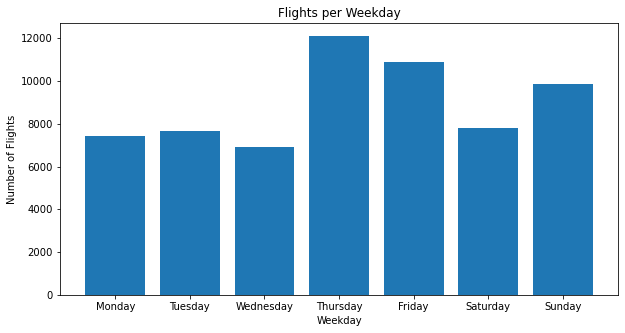

In [59]:
# Convert 'departure_date' to datetime
data['departure_date'] = pd.to_datetime(data['departure_date'])

# Extract day of the week from 'departure_date'
data['weekday'] = data['departure_date'].dt.day_name()

# Count the number of flights for each day of the week
weekday_counts = data['weekday'].value_counts()

# Order the days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.loc[order]

# Create a bar plot of flights per weekday
plt.figure(figsize=(10,5))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Flights per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Flights')
plt.show()

Based on the barplot above, Thursday have the most number of flights weekly and Wednesday have the fewest number of flights weekly

### Average Price per Departure Hour  

C:\Users\mades\AppData\Local\Temp\ipykernel_33488\1885605696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['departure_time'] = pd.to_datetime(data['departure_time'])
C:\Users\mades\AppData\Local\Temp\ipykernel_33488\1885605696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['departure_hour'] = data['departure_time'].dt.hour


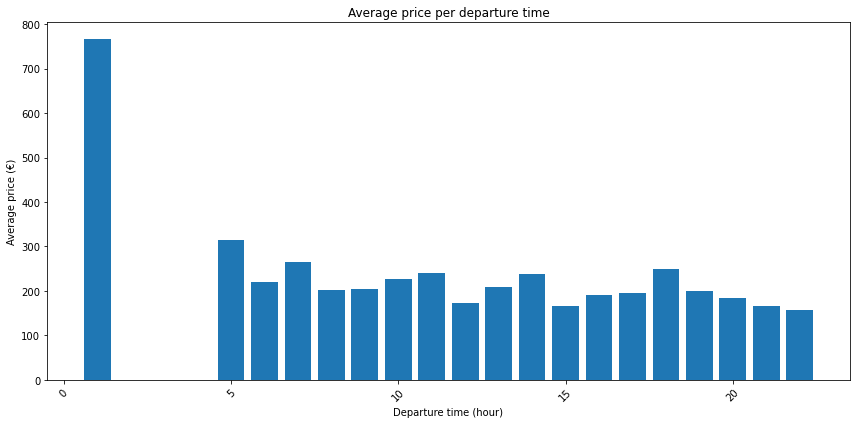

In [63]:
# Convert 'departure_time' to datetime
data['departure_time'] = pd.to_datetime(data['departure_time'])

# Extract hour from 'departure_time'
data['departure_hour'] = data['departure_time'].dt.hour

# Calculate average price for each departure hour
average_price = data.groupby('departure_hour')['price (€)'].mean()

# Create a bar plot of average price per departure hour
plt.figure(figsize=(12,6))
plt.bar(average_price.index, average_price.values)
plt.title('Average price per departure time')
plt.xlabel('Departure time (hour)')
plt.ylabel('Average price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

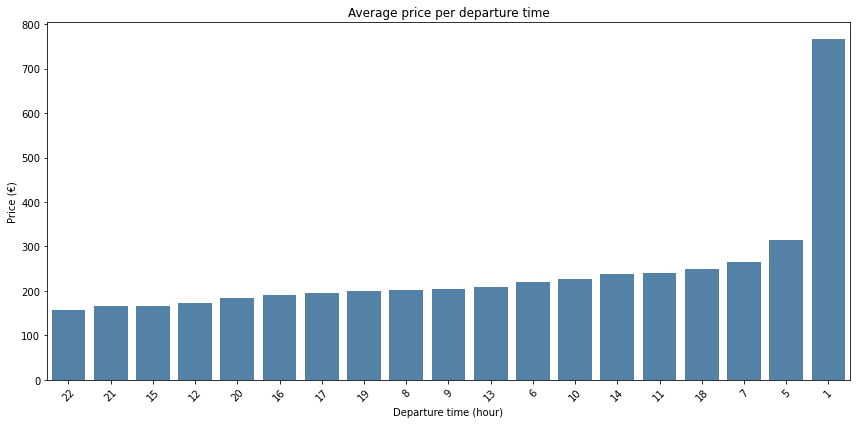

In [67]:
# Calculate average price for each departure hour
average_price = data.groupby('departure_hour')['price (€)'].mean()

# Sort average_price in ascending order
average_price_sorted = average_price.sort_values()

# Create a bar plot of average price per departure hour
plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_sorted.index, y=average_price_sorted.values, color='steelblue', order=average_price_sorted.index)
plt.title('Average price per departure time')
plt.xlabel('Departure time (hour)')
plt.ylabel('Price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- On average, the cheapest flight departs at 22:00 hrs
- Flights on 01:00 hrs have a significant higher average price compared to other hours 
- Flights around 5:00 in the morning also have higher average price compared to other hours 

In [69]:
# Filtering the flights with departure times between 1:00 and 2:59
flights_1_to_2 = data[(data['departure_hour'] == 1)]
flights_1_to_2

,departure_city,arrival_city,scrape_date,departure_date,departure_date_distance,departure_time,arrival_time,airline,stops,price (€),fare_bin,departure_time_24h,arrival_time_24h,weekday,departure_hour
21089,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,6 weeks,2023-11-24 01:50:00,10:00,Lufthansa,(1 Stopp),764.0,"(760.0, 770.0]",01:50,10:00,Sunday,1
21090,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,6 weeks,2023-11-24 01:50:00,14:05,Lufthansa,(1 Stopp),764.0,"(760.0, 770.0]",01:50,14:05,Sunday,1
21091,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,6 weeks,2023-11-24 01:50:00,18:20,Lufthansa,(1 Stopp),764.0,"(760.0, 770.0]",01:50,18:20,Sunday,1
21092,MUC München,FMO Münster/Osnabrück,2019-10-20,2019-12-01,6 weeks,2023-11-24 01:50:00,21:50,Lufthansa,(1 Stopp),771.0,"(770.0, 780.0]",01:50,21:50,Sunday,1


- The flight route is MUC München - FMO Münster/Osnabrück.
- These flights are responsible for the price spike.

### Departure and Arrival Airport 

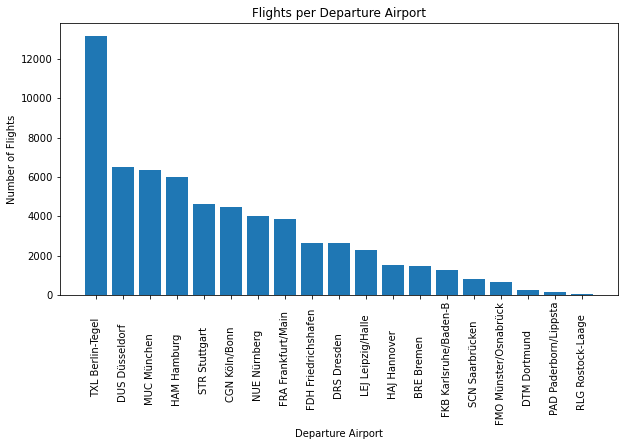

In [71]:
# Count the number of flights for each departure airport
departure_counts = data['departure_city'].value_counts()

# Create a bar plot of flights per departure airport
plt.figure(figsize=(10,5))
plt.bar(departure_counts.index, departure_counts.values)
plt.title('Flights per Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

Based on the Barplot of Flights per Departure Airport above, TXL Berlin-Tegel has the highest number of departure flight with over 12000 flights and RLG Rostock-Laage has the least number departure of flight with less than 2000 flights

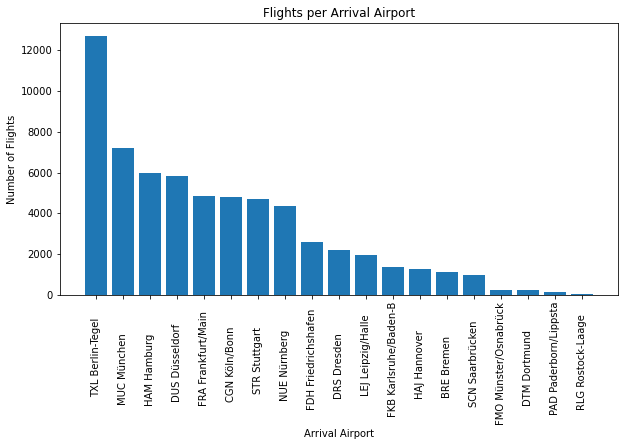

In [74]:
# Count the number of flights for each arrival airport
arrival_counts = data['arrival_city'].value_counts()

# Create a bar plot of flights per arrival airport
plt.figure(figsize=(10,5))
plt.bar(arrival_counts.index, arrival_counts.values)
plt.title('Flights per Arrival Airport')
plt.xlabel('Arrival Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

Based on the Barplot of Flights per Arrival Airport, TXL Berlin-Tegel has the highest number of arrival flight with over 12000 flights and RLG Rostock-Laage has the least number arrival of flight with less than 2000 flights

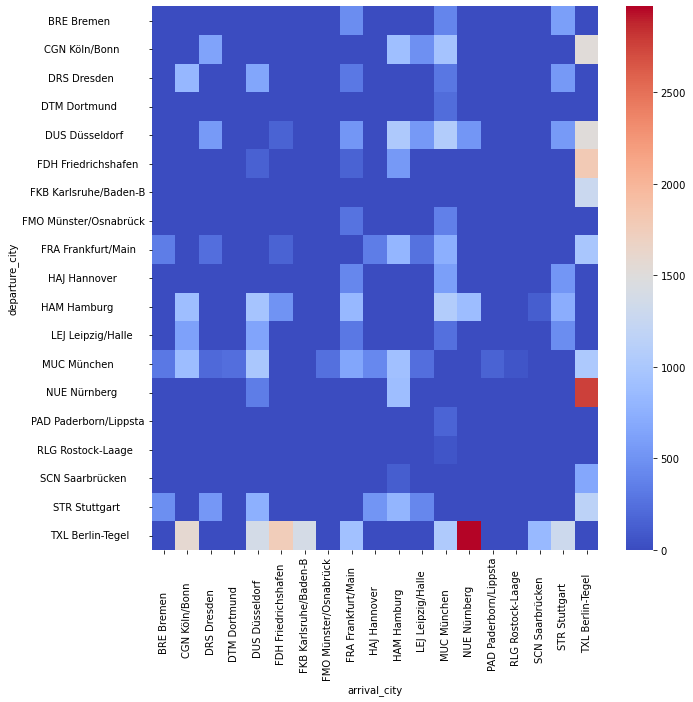

In [72]:
# Create a pivot table with the number of flights between each pair of airports
pivot_table = pd.pivot_table(data, index='departure_city', columns='arrival_city', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(pivot_table, cmap='coolwarm')

# Show the plot
plt.show()

Based on the heatplot above, NUE Nürnberg and TXL Berlin-Tegel have more flights which could indicate a higher demand for travel between these cities 

### Top 10 Departure and Arrival Airport 

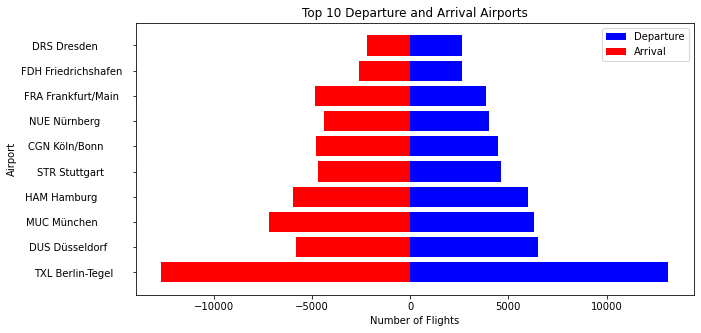

In [79]:
# Get top 10 departure airports
top_departure = data['departure_city'].value_counts().head(10)

# Get top 10 arrival airports
top_arrival = data['arrival_city'].value_counts().head(10)

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the top 10 departure airports
ax.barh(top_departure.index, top_departure.values, color='blue', label='Departure')

# Plot the top 10 arrival airports
ax.barh(top_arrival.index, -top_arrival.values, color='red', label='Arrival')

# Add a legend
ax.legend()

# Add labels and title
ax.set_xlabel('Number of Flights')
ax.set_ylabel('Airport')
ax.set_title('Top 10 Departure and Arrival Airports')

# Show the plot
plt.show()

Munich (MUC) and Frankfurt/Main (FRA) are more popular arrival airports than departure airports.

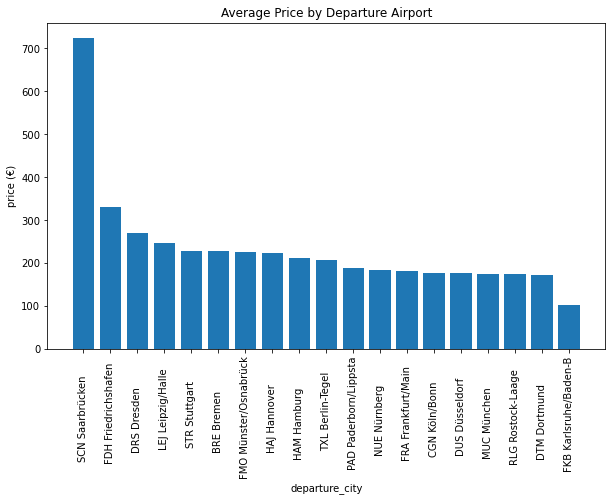

In [95]:
# Group by 'Departure Airport' and calculate the average price
average_price = data.groupby('departure_city')['price (€)'].mean()
average_price = average_price.sort_values(ascending=False)
# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(average_price.index, average_price.values)
plt.xlabel('departure_city')
plt.ylabel('price (€)')
plt.title('Average Price by Departure Airport')
plt.xticks(rotation=90)
plt.show()

- The highest average price is for flights departing from SCN Saarbrücken.
- The lowest average price is for flights departing from FKB Karlsruhe/Baden-Baden.
- The prices of the top 10 departure airports are evenly distributed.

Text(0.5, 1.0, 'Average Price by Arrival Airport')

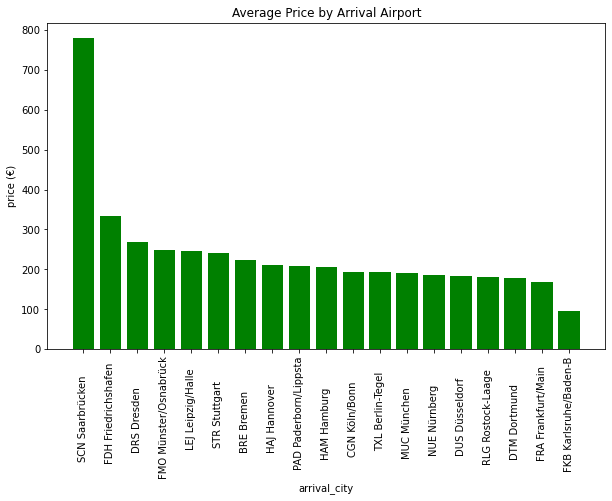

In [93]:
# Group by 'Arrival Airport' and calculate the average price
average_price = data.groupby('arrival_city')['price (€)'].mean()
average_price = average_price.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(average_price.index, average_price.values, color='green')
plt.xlabel('arrival_city')
plt.ylabel('price (€)')
plt.xticks(rotation=90)
plt.title('Average Price by Arrival Airport')

- SCN Saarbrücken has notably higher prices for both departures and arrivals compared to other cities.
- For most cities, the average departure and arrival prices are closely aligned.

### Price & Booking Period 

In [110]:
data['booking_period_in_days'].unique()

array([  7,  14,  30,  90,  42, 180], dtype=int64)

In [112]:
# Calculating the average price for each booking period
average_price_per_booking_period = data.groupby('booking_period_in_days')['price (€)'].mean().round()

# Displaying the average price for each booking period
print(average_price_per_booking_period)

booking_period_in_days
7      255.0
14     219.0
30     198.0
42     192.0
90     170.0
180    237.0
Name: price (€), dtype: float64


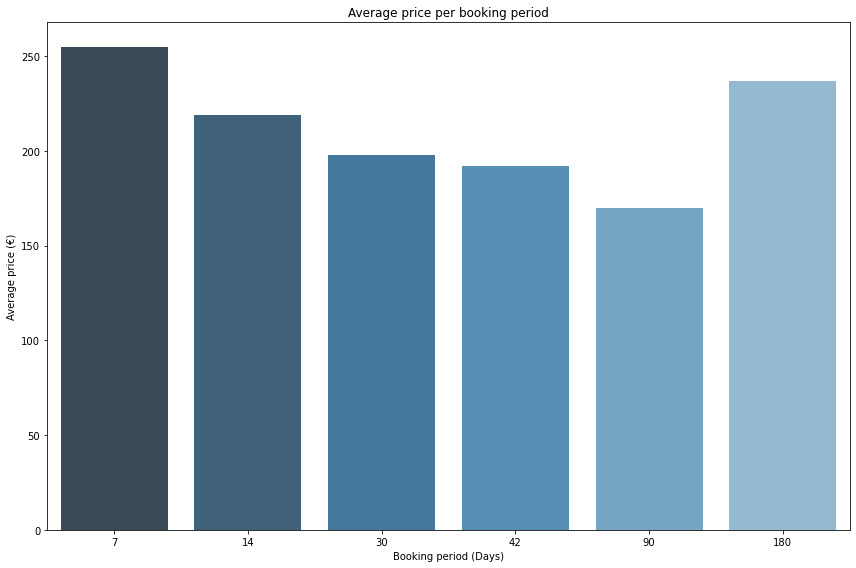

In [113]:
# Plotting the bar chart for the average price per booking period
plt.figure(figsize=(12,8))
sns.barplot(
    x=average_price_per_booking_period.index, 
    y=average_price_per_booking_period.values, 
    palette='Blues_r_d')

plt.title('Average price per booking period')
plt.xlabel('Booking period (Days)')
plt.ylabel('Average price (€)')
plt.tight_layout()
plt.show()

- Short Notice Booking: Booking just a week (7 days) in advance is the most expensive on average.
- Long-Term Booking: Surprisingly, booking 6 months (180 days) in advance is more expensive than booking 3 months in advance.
- Optimal Booking Window: Booking approximately 3 months (90 days) in advance offers the best price.
- Intermediate Booking: Booking 2 weeks to 6 weeks in advance offers prices that are lower than last-minute bookings but still higher than the optimal 3-month window.

### Prices and Stops 

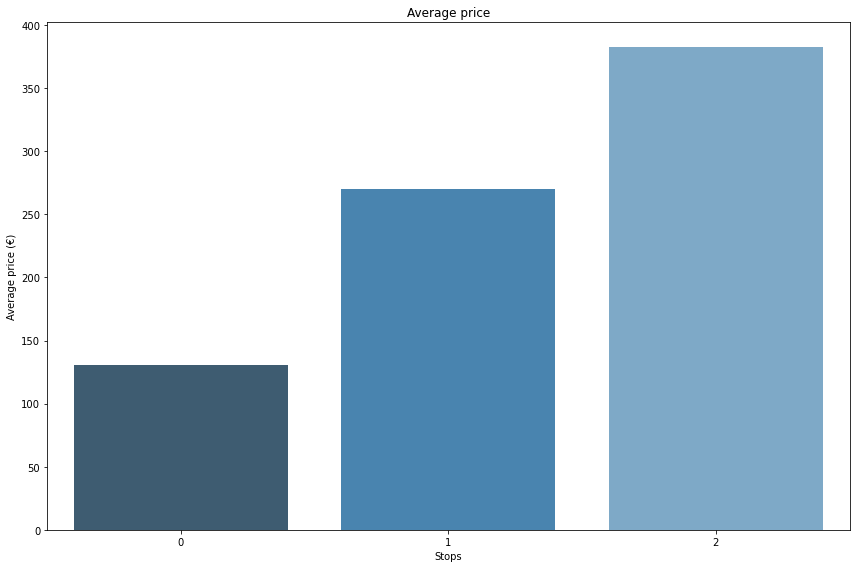

In [115]:
# Calculating the average price for each stops
average_price_per_stop = data.groupby('stops')['price (€)'].mean().round()

# Plotting the bar chart for the average price per stop
plt.figure(figsize=(12,8))
sns.barplot(
    x=average_price_per_stop.index, 
    y=average_price_per_stop.values, 
    palette='Blues_r_d')

plt.title('Average price')
plt.xlabel('Stops')
plt.ylabel('Average price (€)')
plt.tight_layout()
plt.show()

- Direct flights are the cheapest.
- The price increases with the number of stops.

### Routes

In [118]:
# Creating a new column 'route'
data['route'] = data['departure_city'].str[:3] + ' - ' + data['arrival_city'].str[:3]

In [126]:
# Route counts in % 
route_counts = data['route'].value_counts(normalize=True) * 100
route_counts.head(10)

TXL - NUE    4.740842
NUE - TXL    4.415099
FDH - TXL    2.858238
TXL - FDH    2.808738
TXL - CGN    2.532494
CGN - TXL    2.431897
DUS - TXL    2.420720
TXL - FKB    2.208348
TXL - DUS    2.185993
TXL - STR    2.075815
Name: route, dtype: float64

- The route between Berlin-Tegel (TXL) and Nürnberg (NUE) is the most frequent, with both directions (TXL to NUE and NUE to TXL) taking the top two spots.
- The differences between the percentages of these top routes are not vast, suggesting a relatively even distribution of flights among the top route

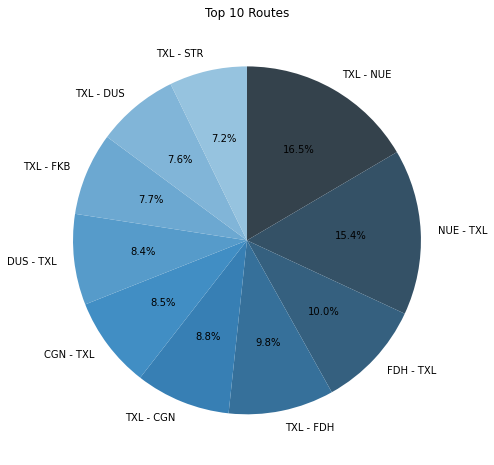

In [127]:
# Top 10 routes
top_10_routes = data['route'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.pie(top_10_routes.values, 
        labels=top_10_routes.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Blues_r_d', len(top_10_routes)), 
        counterclock=False,
)

plt.title('Top 10 Routes')
plt.show()

In [128]:
# Average price of Top 10 Routes 
average_price_top_10_routes = data.groupby('route')['price (€)'].mean().loc[top_10_routes.index].round(2)
average_price_top_10_routes

TXL - NUE    162.72
NUE - TXL    159.89
FDH - TXL    341.01
TXL - FDH    345.33
TXL - CGN    156.40
CGN - TXL    130.04
DUS - TXL    111.01
TXL - FKB     95.69
TXL - DUS    102.22
TXL - STR    199.78
Name: price (€), dtype: float64

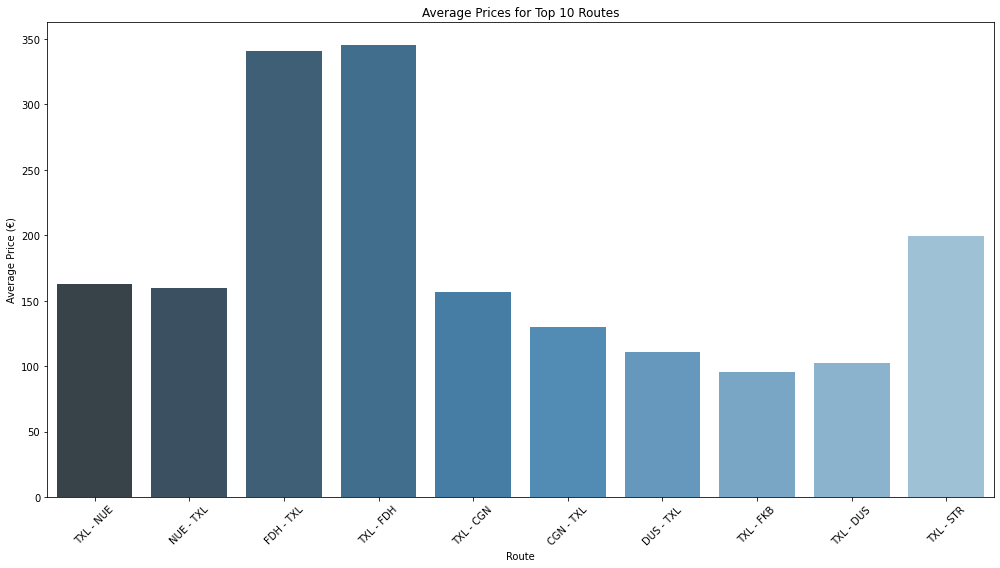

In [129]:
# Plotting a bar chart for the average prices of the top 10 routes
plt.figure(figsize=(14, 8))
sns.barplot(x=average_price_top_10_routes.index, y=average_price_top_10_routes.values, palette='Blues_r_d')

plt.title('Average Prices for Top 10 Routes')
plt.xlabel('Route')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- FDH - TXL and TXL - FDH are noticeably more expensive compared to others
- TXL - FKB and TXL - DUS are among the more affordable options.

In [131]:
flight_routes = data['route'].unique()
flight_routes

array(['TXL - DUS', 'TXL - FRA', 'TXL - FDH', 'TXL - FKB', 'TXL - CGN',
       'TXL - MUC', 'TXL - NUE', 'TXL - SCN', 'TXL - STR', 'BRE - FRA',
       'BRE - MUC', 'BRE - STR', 'DTM - MUC', 'DRS - DUS', 'DRS - FRA',
       'DRS - CGN', 'DRS - MUC', 'DRS - STR', 'DUS - TXL', 'DUS - DRS',
       'DUS - FRA', 'DUS - HAM', 'DUS - LEJ', 'DUS - MUC', 'DUS - NUE',
       'DUS - STR', 'FRA - TXL', 'FRA - BRE', 'FRA - DRS', 'FRA - FDH',
       'FRA - HAM', 'FRA - HAJ', 'FRA - LEJ', 'FRA - MUC', 'FDH - TXL',
       'FDH - FRA', 'FDH - HAM', 'HAM - DUS', 'HAM - FRA', 'HAM - FDH',
       'HAM - CGN', 'HAM - MUC', 'HAM - NUE', 'HAM - SCN', 'HAM - STR',
       'HAJ - FRA', 'HAJ - MUC', 'HAJ - STR', 'FKB - TXL', 'CGN - TXL',
       'CGN - DRS', 'CGN - HAM', 'CGN - LEJ', 'CGN - MUC', 'LEJ - DUS',
       'LEJ - FRA', 'LEJ - CGN', 'LEJ - MUC', 'LEJ - STR', 'MUC - TXL',
       'MUC - BRE', 'MUC - DRS', 'MUC - DUS', 'MUC - FRA', 'MUC - HAM',
       'MUC - HAJ', 'MUC - CGN', 'MUC - LEJ', 'MUC - FMO', 'MUC 

In [132]:
# Counting the routes of each airport
airport_routes_count = [route.split(' - ')[0] for route in flight_routes]
airport_routes_count = pd.Series(airport_routes_count).value_counts()
airport_routes_count

MUC    13
TXL     9
DUS     9
FRA     8
HAM     8
STR     7
DRS     5
CGN     5
LEJ     5
FDH     4
HAJ     3
BRE     3
NUE     3
FMO     2
SCN     2
DTM     1
PAD     1
RLG     1
FKB     1
dtype: int64

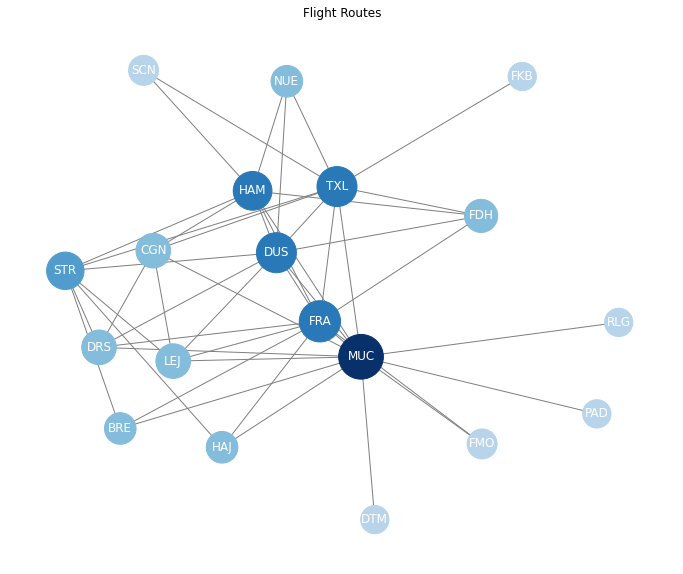

In [135]:
# Graph from 'route'
G = nx.Graph()

for route in data['route']:
    source, destination = route.split(' - ')
    G.add_edge(source, destination)

# Node positioning 
kamada_kawai_pos = nx.kamada_kawai_layout(G)

# Node sizes
degree = dict(G.degree())
node_colors = [v for v in degree.values()]
min_node_size = 800
node_sizes = [min_node_size + (v - min(node_colors)) * 100 for v in node_colors]


# Colors
bins = np.linspace(0, max(node_colors), 6)
node_colors_discrete = np.digitize(node_colors, bins) - 1  # Subtract 1 to make the bins 0-indexed

colors = plt.cm.Blues(np.linspace(0.3, 1, 256))  # Startet bei 0.3, um ein dunkleres Hellblau zu erhalten
custom_blues_cmap = plt.cm.colors.ListedColormap(colors)

# Node diagram 
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, kamada_kawai_pos, 
                       node_size=node_sizes, 
                       node_color=node_colors_discrete, 
                       cmap=custom_blues_cmap, 
                       vmax=5)
nx.draw_networkx_edges(G, kamada_kawai_pos, edge_color='gray')
nx.draw_networkx_labels(G, kamada_kawai_pos, font_size=12, font_color='white')
plt.title('Flight Routes')
plt.axis('off')
plt.show()

- Each node in the graph represents an airport, and the size of the node indicates its connectivity (larger nodes are more connected).
- Edges between nodes signify the existence of a route between two airports.
- The color intensity of the nodes represents the number of connections, with darker nodes having more connections.

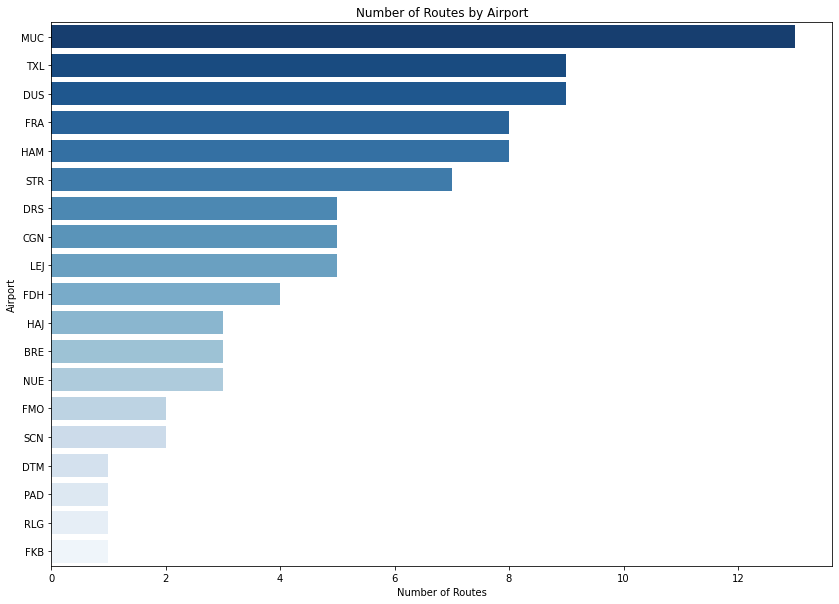

In [136]:
# Set the color palette 
color_palette = sns.color_palette('Blues_r', len(airport_routes_count))

# Plotting the bar chart
plt.figure(figsize=(14,10))
sns.barplot(y=airport_routes_count.index, x=airport_routes_count.values, palette=color_palette)
plt.title('Number of Routes by Airport')
plt.xlabel('Number of Routes')
plt.ylabel('Airport')
plt.show()

### Airlines 

In [137]:
# Count the number of flights for each airline
airline_counts = data['airline'].value_counts()
airline_counts

Lufthansa                        45912
Eurowings                        12289
easyJet                           2935
KLM                                341
Luxair                             290
British Airways                    197
Air France                         194
Multiple Airlines                  153
Swiss International Air Lines      140
Mehrere Fluglinien                  69
Austrian Airlines                   56
LOT-Polish Airlines                 44
Flybe                                3
SAS                                  2
Alitalia                             1
Name: airline, dtype: int64

In [138]:
# Calculate the percentage for each airline
airline_percentage = (airline_counts / airline_counts.sum()) * 100

# Combine the counts and percentages for a comprehensive view
airline_summary = pd.DataFrame({
    'Counts': airline_counts,
    'Percentage (%)': airline_percentage
})
airline_summary

,Counts,Percentage (%)
Lufthansa,45912,73.311404
Eurowings,12289,19.622840
easyJet,2935,4.686552
KLM,341,0.544502
Luxair,290,0.463066
British Airways,197,0.314566
Air France,194,0.309775
Multiple Airlines,153,0.244307
Swiss International Air Lines,140,0.223549
Mehrere Fluglinien,69,0.110178


- Lufthansa dominates the dataset with the highest number of flights, significantly more than the other airlines.
- Eurowings and easyJet follow as the next major carriers, but with significantly fewer flights compared to Lufthansa.
- Some airlines, such as Flybe, SAS, and Alitalia, have very few flights represented in this dataset.

In [139]:
# Avarage Price per Airline 
average_prices_by_airline = data.groupby('airline')['price (€)'].mean().reset_index()
average_prices_by_airline = average_prices_by_airline.sort_values(by='price (€)', ascending=False)
average_prices_by_airline

,airline,price (€)
10,Mehrere Fluglinien,1200.826087
12,SAS,510.000000
2,Austrian Airlines,431.232143
7,LOT-Polish Airlines,361.840909
13,Swiss International Air Lines,303.785714
11,Multiple Airlines,293.411765
3,British Airways,289.375635
9,Luxair,277.475862
8,Lufthansa,247.344756
0,Air France,227.587629


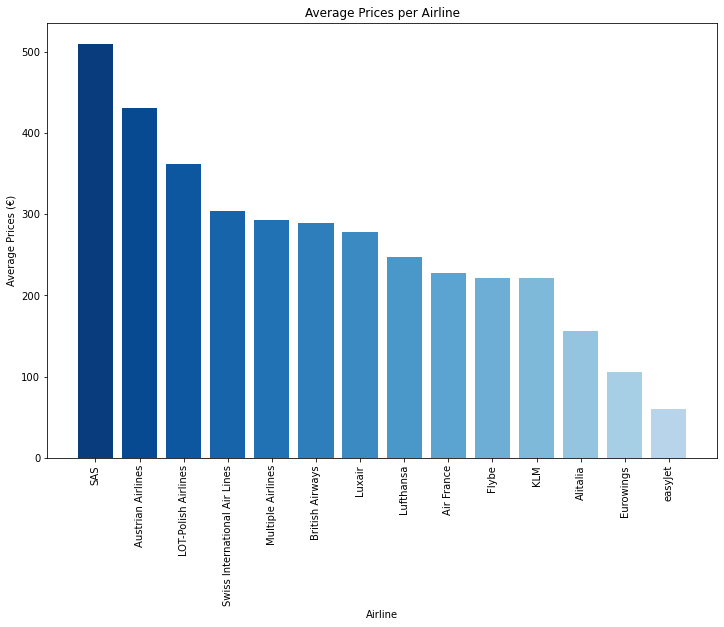

In [141]:
# Bar Char of Average Prices per Airline
plt.figure(figsize=(12, 8))
plt.bar(average_prices_by_airline.iloc[1:]['airline'], average_prices_by_airline.iloc[1:]['price (€)'], color= color_palette)
plt.xlabel('Airline')
plt.ylabel('Average Prices (€)')
plt.title('Average Prices per Airline')
plt.xticks(rotation=90)  
plt.show()

### Conclusion 

- Flying with multiple airlines has the highest average ticket price.
- easyJet offers the lowest average price, which aligns with its positioning as a budget airline.
- Eurowings, another budget airline, also has a relatively low average price.
- raditional carriers like Lufthansa, British Airways, and Air France have prices in the mid-range, reflecting their broader service offerings and possible route complexities.